In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from mpl_toolkits import mplot3d

In [8]:
dataset = pd.read_csv('Downloads\Breast_cancer_data.csv')
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


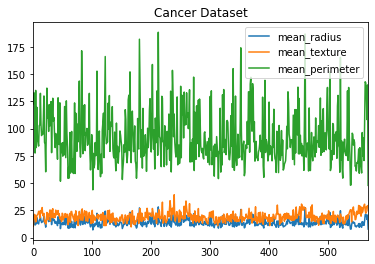

In [10]:
dataset.drop(['diagnosis','mean_area','mean_smoothness'], axis=1).plot.line(title='Cancer Dataset')

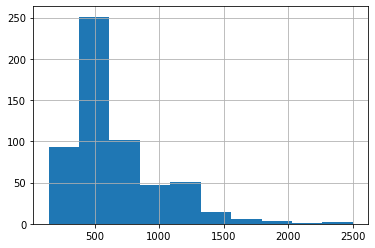

In [11]:
dataset['mean_area'].hist()

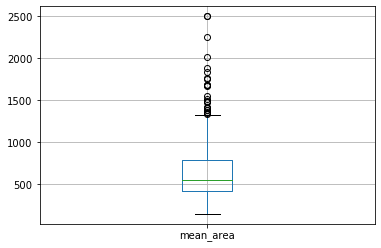

In [12]:
dataset.boxplot(column = 'mean_area')

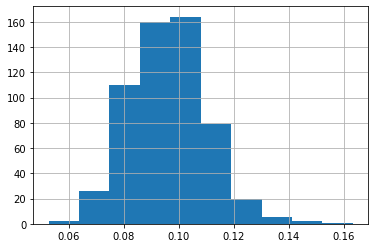

In [13]:
dataset['mean_smoothness'].hist()

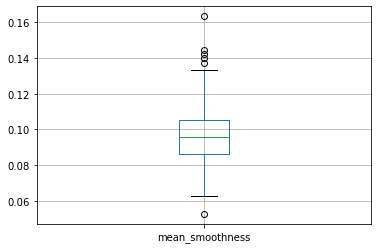

In [14]:
dataset.boxplot(column = 'mean_smoothness')

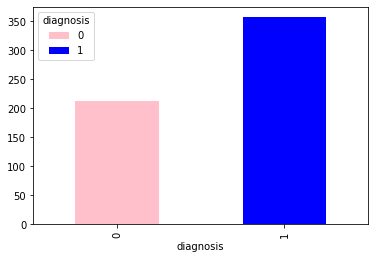

In [15]:
# number of samples ! for infected and 0 for non-infected
temp3 = pd.crosstab(dataset['diagnosis'], dataset['diagnosis'])
temp3.plot(kind='bar', stacked=True, color=['pink','blue'], grid=False)

[None, None, None, None, None, None, None, None, None, None, None, None]

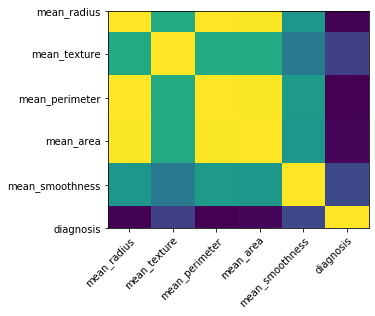

In [16]:
#HeatMap of dataset corrilation
corr = dataset.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

In [17]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 6)


In [18]:
dataset.isnull().sum()
dataset.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [19]:
X = dataset.iloc[:, 0:5].values
Y = dataset.iloc[:,5].values

In [20]:
# Spliting data into trainingset(75%) and testset(25%)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [21]:
# Scaling the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Using Logistic Regression Algorithm to the Training Set

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
Y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [25]:
print(cm)

[[48  5]
 [ 6 84]]


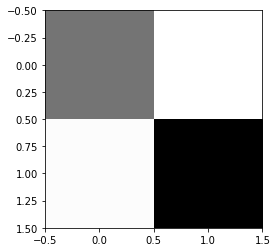

In [26]:
plt.imshow(cm, cmap='binary')

In [27]:
#Using SVC method of svm class to use Kernel SVM Algorithm

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
Y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [30]:
print(cm)

[[47  6]
 [ 5 85]]


In [31]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [32]:
accur = accuracy(cm)
print("Model Accuracy: ", accur)

Model Accuracy:  0.9230769230769231


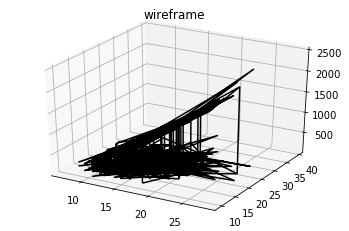

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(dataset['mean_radius'], dataset['mean_texture'], np.array([dataset['mean_perimeter'],dataset['mean_area']]), color='black')
ax.set_title('wireframe');

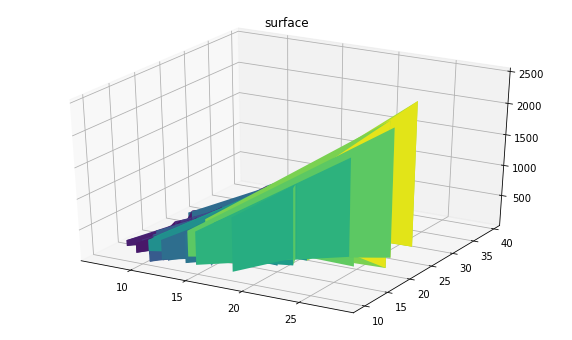

In [34]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(dataset['mean_radius'], dataset['mean_texture'], np.array([dataset['mean_perimeter'],dataset['mean_area']]), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [15]:
import numpy as np
from mayavi.mlab import *

def test_imshow():
    
    s =  np.array(dataset['mean_radius'],dataset['mean_texture'],[dataset['mean_perimeter'],dataset['mean_area'],dataset['mean_smoothness'],dataset['diagnosis']])
    return imshow(s, colormap='gist_earth')

In [16]:
from mayavi import mlab
mlab.test_imshow()
mlab.show()

In [11]:
import numpy as np
from mayavi.mlab import *

def test_plot3d():
    """Generates a pretty set of lines."""
    n_mer, n_long = 6, 11
    dphi = np.pi / 1000.0
    phi = np.arange(0.0, 2 * np.pi + 0.5 * dphi, dphi)
    mu = phi * n_mer
    x = dataset['mean_radius']
    y = dataset['mean_texture']
    z = np.array([dataset['mean_perimeter'],dataset['mean_area']])

    l = plot3d(x, y, z, np.sin(mu), tube_radius=0.025, colormap='Spectral')
    return l

In [12]:
# tm.py
from mayavi import mlab
mlab.test_plot3d()
mlab.show()

In [13]:
import numpy
from mayavi.mlab import *

def test_imshow():
    """ Use imshow to visualize a 2D 10x10 random array.
    """
    s = np.random.random((10, 10))
    return imshow(s, colormap='gist_earth')

In [14]:
from mayavi import mlab
mlab.test_imshow()
mlab.show()

In [3]:
import numpy as np
from mayavi.mlab import *

def test_quiver3d():
    x, y, z = np.mgrid[-2:3, -2:3, -2:3]
    r = np.sqrt(x ** 2 + y ** 2 + z ** 4)
    u = y * np.sin(r) / (r + 0.001)
    v = -x * np.sin(r) / (r + 0.001)
    w = np.zeros_like(z)
    obj = quiver3d(x, y, z, u, v, w, line_width=3, scale_factor=1)
    return obj

In [4]:
from mayavi import mlab
mlab.show(test_quiver3d())

<function mayavi.tools.show.show.<locals>.wrapper(*args, **kw)>

In [1]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()